## InfoPillar Solution PVT LTD Internship
## Name Jitender Kumar
## Project idea – Fake news spreads like a wildfire and this is a big issue in this era.
## Task2


In [ ]:
### Importing important Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
fake_news=pd.read_csv('news.csv') #READING THE DATASET

In [3]:
fake_news.head() # HERE IS THE HEAD OF DATA

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
fake_news.info() #HERE IS THE INFO RELATED TO THE ROWS AND COLUMNS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
fake_news.shape # SHAPE OF THE DATASET i.e.rows and columns

(6335, 4)

In [6]:
fake_news.describe() #statistical information of the data

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


## Cleaning the Data

In [7]:
fake_news.isna().sum()# there is no null value so we can proceed further

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
label = {"REAL": 0, "FAKE": 1} #converting categorical data into numerical form
fake_news['label'] = fake_news['label'].map(label)
fake_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [9]:
fake_news['label'].value_counts() # total count of fake and real news

0    3171
1    3164
Name: label, dtype: int64

In [ ]:
# EDA part

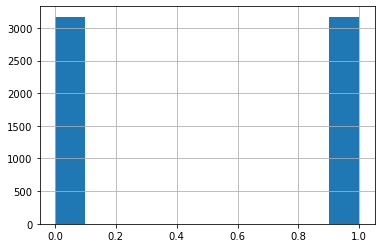

In [10]:
fake_news['label'].hist();

In [11]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\AARADHYA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stem_words = PorterStemmer()

### Streaming the data 

In [13]:
def stemming(data):
    stemmed_content = re.sub('[^a-zA-Z]',' ',data)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stem_words.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
fake_news['title'] = fake_news['title'].apply(stemming)

# visulaissation of the data 

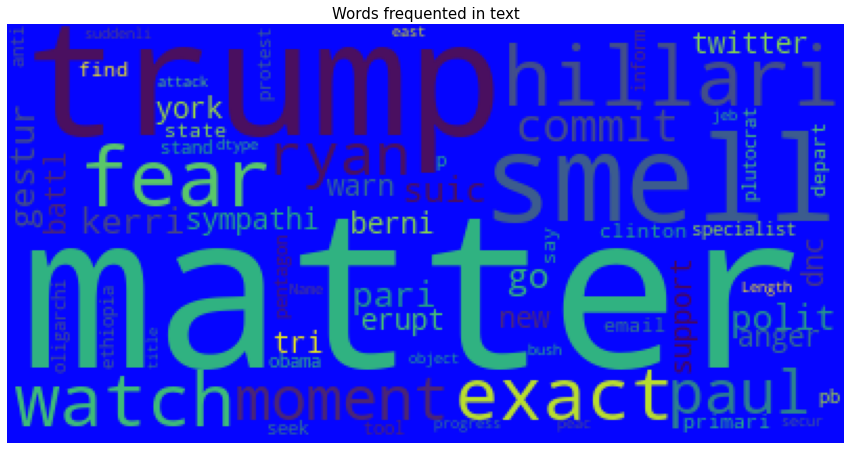

In [15]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                        background_color='blue',
                        stopwords=stopwords,
                        max_words=200, 
                        random_state=42).generate(str(fake_news['title']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

# Modeling the Data

In [20]:
label=fake_news.label
print(label)

0       1
1       1
2       0
3       1
4       0
       ..
6330    0
6331    1
6332    1
6333    0
6334    0
Name: label, Length: 6335, dtype: int64


In [30]:
X = fake_news['title'].values # taking x and y on which we have to split the data
Y = fake_news['label'].values

In [31]:
print(X) # here is the output of x and y
print(Y)

['smell hillari fear'
 'watch exact moment paul ryan commit polit suicid trump ralli video'
 'kerri go pari gestur sympathi' ...
 'anti trump protest tool oligarchi inform'
 'ethiopia obama seek progress peac secur east africa'
 'jeb bush suddenli attack trump matter']
[1 1 0 ... 1 0 0]


In [32]:
vectorizer = TfidfVectorizer() # transorminf the data
vectorizer.fit(X)

X = vectorizer.transform(X)

### Spliting the data into x and y

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### checking Accuracy

In [37]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [38]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9114048934490924


__Hence we have a accuracy of model about 91 i.e. is good model and we can say that model is significant__

### Predicting the Model

In [39]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [40]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7955801104972375


In [42]:
X_new = X_test[0]
prediction = model.predict(X_new)

if (prediction[0]==1):
    print('The news is Real')
else:
    print('The news is Fake')

The news is Real


In [43]:
print(Y_test[0])

1
